# [Phystech@DataScience](https://thetahat.ru/courses/ph-ds-2025-spr)
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейках, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 30 баллов

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 3 &mdash; 35 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 25 баллов



-----

In [1]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import gamma, loggamma

sns.set_style("whitegrid")

%matplotlib inline

## Теоретическая часть
### <b><i><font color="blue">Легкая часть</font></i></b> 

### Задание 1

Пусть $x_1, \dots, x_n$ &mdash; реализация выборки, $X^{*}_1, X^{*}_2, \dots, X^{*}_n$ &mdash; построенная по ней бутстрепная выборка. С какой вероятностью элемент $x_i$ исходной выборки попадёт в бутстрепную? Посчитайте среднее число уникальных (попарно различных) элементов в бутстрепной выборке, если в исходной выборке все элементы различны? К какой функции от $n$ стремится это количество при $n \rightarrow \infty$?


Бутстрепная выборка $X_1^{*}, X_2^{*},. . . ,X_n^{*}$ строится из реализации исходной выборки с возвращением. Тогда вероятность выбрать элемент $x_i$ есть $\frac{1}{n}, \\ \forall i = 1, ..., n$. Тогда веротяность не выбрать элемент $x_i$ для одного испытания есть $P$(не выбрать $x_i$) = $1 - \frac{1}{n}$. Тогда вероятность не выбрать элемент $x_i$ ни разу за $n$ выборов есть $P$(не выбрать $x_i$ ни разу) = $(1-\frac{1}{n})^n$. Тогда вероятность выбрать элемент $x_i$ хотя бы один раз есть $P$($x_i$ попал в бутстрепную выборку) = $1 - (1-\frac{1}{n})^n$.

Найдем математическое ожидание (среднее) числа уникальных элементов в бутстрепной выборке. 
Пусть $I_i$ - индикатор элемента $x_i$, то есть $I_i = 1$, если $x_i$ попал в бутстрепную выборку и $I_i = 0$, если $x_i$ не попал в бутстрепную выборку. Тогда число уникальных элементов в бутстрепной выборке есть $N = \displaystyle\sum_{i=1}^{n} I_i$. Тогда искомое математическое ожидание есть 
\begin{equation*}
\mathbb{E}[N] = \mathbb{E}\Big[\displaystyle\sum_{i=1}^{n} I_i\Big] =\displaystyle\sum_{i=1}^{n}\mathbb{E}[I_i] = n\mathbb{E}[I_i],
\end{equation*}
где $\mathbb{E}[I_i] =$ $P$($x_i$ попал в бутстрепную выборку) = $1 - \Big(1-\frac{1}{n}\Big)^n$, $\forall i = 1,...,n$. Тогда
\begin{equation*}
\mathbb{E}[N] = n\Big[1 - \Big(1-\frac{1}{n}\Big)^n\Big].
\end{equation*}

Если теперь устремить размер выборки к бесконечности, то получим 
\begin{equation*}
\lim\limits_{n \to \infty} \mathbb{E}[N] = \lim\limits_{n \to \infty}n\Big[1 - \Big(1-\frac{1}{n}\Big)^n\Big] = n\Big(1 - \frac{1}{e}\Big) \approx 0.623n.
\end{equation*}

### <b><i><font color="orange">Сложная часть</font></i></b>


### Задание 2

Рассмотрим модель линейной регрессии

$$Y = X \theta + ɛ,$$

где $Y \in \mathbb{R}^n$ - отклик, $X \in \mathbb{R}^{n \times d}$, $\theta \in \mathbb{R}^d$, $ɛ \in \mathbb{R}^n$ - шум, $n > d$, $rk X = d$.

Будем рассматривать нормальный и гомоскедастичный шум, т.е. $ɛ \sim \mathcal{N}(0, 1)$

1. Получите выражение для функции правдоподобия в данной модели. Минимизации какой функции потерь эквивалента максимизация правдоподобия в данной задаче?
2. Найдите оценку максимального правдоподобия для $(\theta, \sigma^2)$.

3. Пусть $x_{new} \in \mathbb{R}^{d}$ - новый объект. Постройте асимптотический доверительный интервал для ожидаемого значения отклика на этом объекте $y_{new} = x_{new}^T \theta$.
    <br>*Указание:* используя модель регрессии, получите распределение, которое имеет величина $\widehat{\theta}_{\text{МНК}}$. Учитывая свойства, данные в домашнем задании №6, получите распределение для  $x_{new}^T\widehat{\theta}_{\text{МНК}}$. Считая величину $\sigma^2$ известной, запишите интервал. Далее замените дисперсию $\sigma^2$ на ее состоятельную оценку.

4. Также постройте точный доверительный интервал для ожидаемого значения отклика на том же новом объекте $x_{new}$.

1. Т.к. шум $\varepsilon_i \sim \mathcal{N}(0, 1)$, а $Y = X\theta + \varepsilon$, то $y_i \sim \mathcal{N}(x_i^T\theta, \sigma^2)$. Тогда можем записать плотность распределения $y_i$
\begin{equation*}
f(y_i|\theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot exp\Big(-\frac{(y_i -x_i^T\theta)^2}{\sigma^2}\Big).
\end{equation*}
Тогда функция правдоподобия для всех выборки имеет вид
\begin{equation*}
\mathcal{L}(\theta, \sigma^2) = \displaystyle\prod_{i=1}^{n}f(y_i|\theta, \sigma^2) = \displaystyle\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}} \cdot exp\Big(-\frac{(y_i -x_i^T\theta)^2}{\sigma^2}\Big).
\end{equation*}
Логарифмируем
\begin{equation*}
\ln \mathcal{L}(\theta, \sigma^2) = -\frac{n}{2}\ln 2\pi -\frac{n}{2}\ln \sigma^2 - \frac{1}{2\sigma^2}\displaystyle\sum_{i=1}^{n}(y_i -x_i^T\theta)^2.
\end{equation*}
Легко видеть, что максимизация $\ln \mathcal{L}(\theta, \sigma^2)$, а значит и $\mathcal{L}(\theta, \sigma^2)$ эквивалента минимизации суммы квадратов ошибок $\displaystyle\sum_{i=1}^{n}(y_i -x_i^T\theta)^2$, то есть минимизации MSE. 
2. Найдем ОМП для $\theta$ и $\sigma^2$:
\begin{equation*}
\frac{\partial }{\partial \theta}\displaystyle\sum_{i=1}^{n}(y_i -x_i^T\theta)^2 = -2X^T(Y-X\hat{\theta}) = 0, 
\end{equation*}
откуда $X^TY = X^TX\hat{\theta}$, а значит $\hat{\theta} = (X^TX)^{-1}X^TY$, т.е. воспользовались тем, что $\hat{\theta} = \widehat{\theta}_{\text{МНК}}$.

\begin{equation*}
\frac{\partial \ln \mathcal{L}}{\partial \sigma^2} = -\frac{n}{2\hat{\sigma}^2} + \frac{1}{2\hat{\sigma}^4}\displaystyle\sum_{i=1}^{n}(y_i -x_i^T\hat{\theta})^2 = 0, 
\end{equation*}
откуда $\hat{\sigma}^2 = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(y_i -x_i^T\hat{\theta})^2$.

3. Так как $\varepsilon \sim \mathcal{N}(0, 1)$, то $\widehat{\theta}_{\text{МНК}} \sim \mathcal{N}(\theta, \sigma^2(X^TX)^{-1})$. Тогда $x_{new}^T \widehat{\theta}_{\text{МНК}} \sim \mathcal{N}(x_{new}^T\theta, \sigma^2 x_{new}^T(X^TX)^{-1}x_{new})$. Доверительный интервал при известной $\sigma$ при этом имеет вид  $x_{new}^T \widehat{\theta}_{\text{МНК}}  \pm z_{\frac{1-\alpha}{2}} \cdot \sigma \sqrt{x_{new}^T(X^TX)^{-1}x_{new}}$, где $z_{\frac{1-\alpha}{2}}$ - квантиль нормального распределения. Оценка $\hat{\sigma}^2$ состоятельная, поэтому для асимптотического доверительного интервала получаем $x_{new}^T \widehat{\theta}_{\text{МНК}}  \pm z_{\frac{1-\alpha}{2}} \cdot \hat{\sigma} \sqrt{x_{new}^T(X^TX)^{-1}x_{new}}$.

4. Точный доверительный интервал:  $$y_{new} = x_{new}^T \theta \in \Big(x_{new}^T\hat{\theta}_{ОМП} \pm T_{n-d, \frac{1+\alpha}{2}}\frac{\sqrt{(Y-X\theta)^T(Y-X\theta)}\sqrt{x_{new}^T(X^TX)^{-1} x_{new}}}{\sqrt{n(n-d)}}\Big)$$, где $ T_{n-d, \frac{1+\alpha}{2}}$ - квантиль распределения стьюдента с $n-d$ степенями свободы, а оценка $\hat{\sigma}$ уже подставлена в матричном виде: 
$\hat{\sigma} = \sqrt{\frac1n (Y-X\theta)^T(Y-X\theta)}$.

## Практическая часть
### <b><i><font color="blue">Легкая часть</font></i></b> 
### Задание 3
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить:
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.


 Запишите их в виде таблицы.

Сделайте выводы по полученной таблице.

**Вывод:**

### Задание 4

**Профиль Физика**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data">данные</a> столкновениях частиц и оставьте следующие признаки:
* `E1`, `E2` &mdash; полная энергия электронов (ГэВ);
* `M` &mdash; инвариантная масса двух электронов (ГэВ).

Датасет большой, поэтому для ускорения расчетов можно взять подвыборку размера ~ 1000 

**Профиль биология**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression">данные</a> экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `ITSN1_N`
* `DYRK1A_N`
* `ELK_N`




**1.** Постройте для каждого из них гистограммы. Что можно сказать о характере распределения?


In [ ]:
df = pd.read_csv("your/data/path")

**Ответ:** 

**2.** Пусть есть выборка $X_1, ..., X_n$. Опишите процедуру бутстрепа построения доверительного интервала для величины $\theta = \mathsf{E} X_1$. Рассмотрите три типа  бутстрепных доверительных интервалов.
Выпишите соответствующие формулы. 

**Описание**:


**3.** Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку и количество бутстрепных выборок $B$. 

Для ускорения расчетов можете использовать broadcasting (не является обязательным требованием). Учите, что в таком случае внутри функции у вас могут получиться очень большие матрицы, из-за которых может кончиться оперативная память. 

In [ ]:
def bootstrap(sample, B=100_000): 
    '''
    Считает бутстрепные оценки для исходной выборки

    :param sample: исходная выборка
    :param B: количество бутстрепных 
    :return bootstrap_estimations: оценки по бутстрепным выборкам
    '''   
    
    return


**4.** Реализуйте три типа бутстрепных доверительных интервалы в виде функций, принимающих на вход выборку оценок, полученных с помощью бутстрепа. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. 

In [ ]:
def bootstrap_normal_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу нормального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   

    return

    
def bootstrap_central_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу центрального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   

    return

    
def bootstrap_quantile_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу квантильного бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   
    
    return

**5.** Для каждого признака постройте бутстрепные доверительные интервалы для $\theta = \mathsf{E} X_1$ и сравните их.

In [ ]:
data = pd.DataFrame(index = ['normal', 'central', 'quantile', 'theta', 'interval_length'], columns=df.columns)

**Вывод:** 

Визуализируйте бутстрепные интервалы для каждого признака. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию

In [ ]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    
    return
    

**Решение:**

**Вывод:** 

### <b><i><font color="orange">Сложная часть</font></i></b>
### Задача 5
Как мы помним, асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки, а что насчет точных доверительных интервалов? В этом задании вновь необходимо посчитать реальный уровень доверия.

Допустим, вы хотите оценить реальный уровень доверия интервала для $a$, если $X \sim \mathcal{N}(a, \sigma^2)$.

- Фиксируете истинные $(a, \sigma^2)$, для которых будете делать оценку
- Генерируете $B$ выборок из $\mathcal{N}(a, \sigma^2)$ с зафиксированными параметрами
- По каждой выборке получаете ДИ для $a$ 
- Считаете долю случаев, когда истинное $a$ попадает в интервал

Эта доля и будет оценкой доли покрытия интервала.

**Важно:** вы симулируете реальную ситуацию, когда вы не знаете ни $a$, ни $\sigma$, поэтому в формулах для ДИ их **использовать нельзя**!

**Важно:** при такой оценке реального уровня доверия вы используете метод Монте-Карло. Погрешность этого метода составляет $\sim \frac{1}{\sqrt{n}}$, где $n$ - количество выборок, по которым осуществляется оценка. 

*Вопрос:* какое $n$ нужно брать, если вы хотите оценить реальный уровень доверия с точностью до 2 знаков ($\delta = 0.01$)? 

**Ваш ответ:** Т.к. погрешность метода Монте-Карло есть $\frac{1}{\sqrt{n}}$, то для точности $\delta = 0.01$ необходимо $n = 10000$ выборок.


**1.** Генерация выборок для оценки

Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [43]:
theta = 0  # истинное значение параметра
sample_size = 300
sample_count = 10000
X = np.random.normal(loc=theta, scale=1, size = (sample_count, sample_size))

**2.** Построение ТДИ

На лекции вы получали формулу для точного доверительного интервала для $a$ в нормальной модели

Точный доверительный интервал: $\theta \in \Big(\overline{X} \pm \frac{T_{n-1, \frac{1+\alpha}{2}}}{\sqrt{n-1}}S \Big)$, где $S^2$ - состоятельная оценка дисперсии.

**Вопрос:** чем этот интервал лучше предыдущего?

**Ваш ответ:** Точный доверительный интервал лучше асимптотического тем, что его уровень доверия не зависит от размера выборки, тогда как асимптотический доверительный интервал гарантирует нужный уровень доверия только при больших размерах выборки.

Постройте график реального уровня доверия интервала от размера выборки для этого вида интервала. График начинайте с $n=2$. Сравните его поведение с асимптотическим ДИ. 

In [46]:
from scipy.stats import t, norm
alpha = 0.95
exact = []
asymp = []
sample_sizes = np.arange(2, sample_size + 1)
for n in sample_sizes:
    samples = X[:, :n]
    x_mean = np.mean(samples, axis=1)
    s = np.std(samples, axis=1, ddof=1)

    t_quantile = t.ppf((1+alpha)/2, df = n-1)
    exact_left = x_mean - t_quantile * s / np.sqrt(n-1)
    exact_right = x_mean + t_quantile * s / np.sqrt(n-1)

    z_quantile = norm.ppf((1+alpha)/2)
    asymp_left = x_mean - z_quantile * s / np.sqrt(n)
    asymp_right = x_mean + z_quantile * s / np.sqrt(n)

    exact.append(np.mean((exact_left < theta) & ( theta < exact_right)))
    asymp.append(np.mean((asymp_left < theta) & (theta < asymp_right)))




    


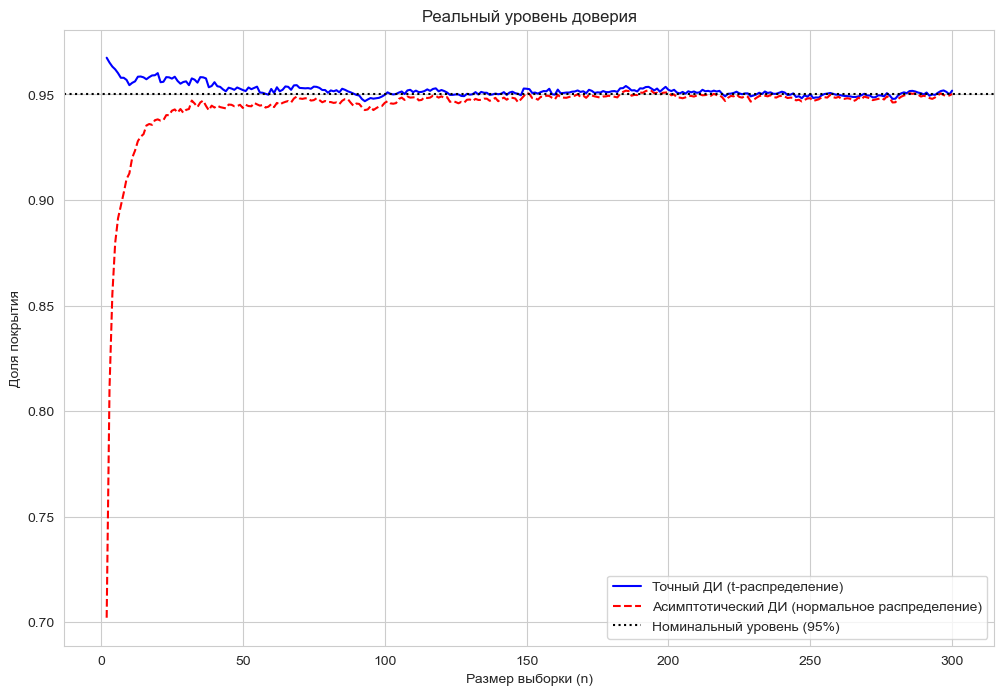

In [47]:
plt.figure(figsize=(12,8))
plt.plot(sample_sizes, exact, label='Точный ДИ (t-распределение)', color='blue')
plt.plot(sample_sizes, asymp, label='Асимптотический ДИ (нормальное распределение)', color='red', linestyle='--')
plt.axhline(y=0.95, color='black', linestyle=':', label='Номинальный уровень (95%)')

plt.xlabel('Размер выборки (n)')
plt.ylabel('Доля покрытия')
plt.title('Реальный уровень доверия')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:** Видим, что в пределах погрешности уровень доверия, гарантированный точным доверительным интервалом (ТДИ) не зависит от размера выборки. В то же время для асимптотического доверительного интервала (АДИ) реальный уровень доверия на малых размерах выборки сильно меньше номинального, но уже при $n \approx 100$ практически совпадает с ним в пределах некоторой погрешности.